In [1]:
import tensorflow as tf
from tensorflow import keras
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPUs available: {len(gpus)}")
    for gpu in gpus:
        print(gpu)
else:
    print("No GPUs available.")

GPUs available: 1
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import tarfile
import pickle
import numpy as np
import os

def load_cifar10_from_tar(cifar10_path, extract_dir):
    """لود دیتاست CIFAR-10 از فایل tar.gz بدون هیچ تغییری"""
    
    # اکسترکت فایل
    with tarfile.open(cifar10_path, 'r:gz') as tar:
        tar.extractall(path=extract_dir)
    
    def load_batch(file_path):
        """لود یک بچ از CIFAR-10"""
        with open(file_path, 'rb') as f:
            batch = pickle.load(f, encoding='latin1')
            images = batch['data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
            labels = batch['labels']
            return images, np.array(labels)
    
    # لود داده‌های آموزشی
    train_images, train_labels = [], []
    for i in range(1, 6):
        batch_path = os.path.join(extract_dir, 'cifar-10-batches-py', f'data_batch_{i}')
        images, labels = load_batch(batch_path)
        train_images.append(images)
        train_labels.append(labels)
    
    # ترکیب بچ‌ها
    train_images = np.concatenate(train_images)
    train_labels = np.concatenate(train_labels)
    
    # لود داده‌های تست
    test_path = os.path.join(extract_dir, 'cifar-10-batches-py', 'test_batch')
    test_images, test_labels = load_batch(test_path)
    
    # نام کلاس‌ها
    meta_path = os.path.join(extract_dir, 'cifar-10-batches-py', 'batches.meta')
    with open(meta_path, 'rb') as f:
        meta = pickle.load(f, encoding='latin1')
        class_names = meta['label_names']
    
    return (train_images, train_labels), (test_images, test_labels), class_names

# مسیرهای فایل
cifar10_path = r"D:\Just be better\AI2\aio learn projects\dl\data\cifar10\cifar-10-python.tar.gz"
extract_dir = r"D:\Just be better\AI2\aio learn projects\dl\data\cifar10_extracted"

# لود داده‌ها
(train_images, train_labels), (test_images, test_labels), class_names = load_cifar10_from_tar(cifar10_path, extract_dir)

# نمایش اطلاعات
print("✅ داده‌ها با موفقیت لود شدند!")
print(f"تصاویر آموزشی: {train_images.shape} (مقادیر پیکسل بین {train_images.min()} تا {train_images.max()})")
print(f"برچسب‌های آموزشی: {train_labels.shape}")
print(f"تصاویر تست: {test_images.shape}")
print(f"نام کلاس‌ها: {class_names}")

✅ داده‌ها با موفقیت لود شدند!
تصاویر آموزشی: (50000, 32, 32, 3) (مقادیر پیکسل بین 0 تا 255)
برچسب‌های آموزشی: (50000,)
تصاویر تست: (10000, 32, 32, 3)
نام کلاس‌ها: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
train_images , test_images = train_images / 255.0 , test_images / 255.0

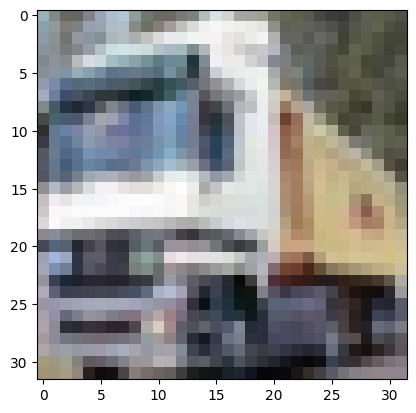

truck


In [6]:
import matplotlib.pyplot as plt

plt.imshow(train_images[1]) 
plt.show()
print(class_names[train_labels[1]])

In [7]:
from keras import models
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

model = models.Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape = (32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [9]:
model.compile(optimizer='adam',metrics=['accuracy'],
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [10]:
h = model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 19s 3ms/step - loss: 1.5100 - accuracy: 0.4481 - val_loss: 1.1995 - val_accuracy: 0.5687
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.1474 - accuracy: 0.5940 - val_loss: 1.1027 - val_accuracy: 0.6118
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9998 - accuracy: 0.6463 - val_loss: 1.0092 - val_accuracy: 0.6437
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9059 - accuracy: 0.6830 - val_loss: 0.9527 - val_accuracy: 0.6663
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8337 - accuracy: 0.7076 - val_loss: 0.8912 - val_accuracy: 0.6927
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7728 - accuracy: 0.7283 - val_loss: 0.9907 - val_accuracy: 0.6631
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7295 - accuracy: 0.7447 - val_loss: 0.8870 - val_accuracy

'cat'

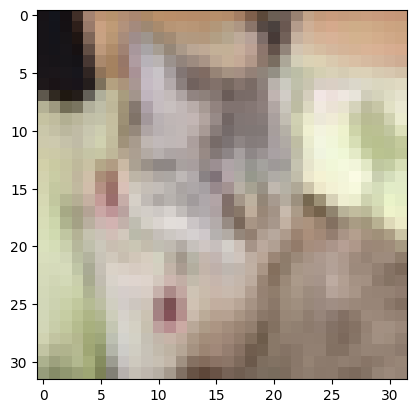

In [46]:
plt.imshow(test_images[8])
class_names[test_labels[8]]

1/1 [==============================] - 0s 13ms/step
پیش‌بینی‌ها: [[ -4.8523498  -7.604472    1.7923757   2.9234948   2.307848    1.06924
    2.7941952   0.7995504 -10.772399   -8.450419 ]]

کلاس پیش‌بینی شده: cat
با احتمال: 2.9235


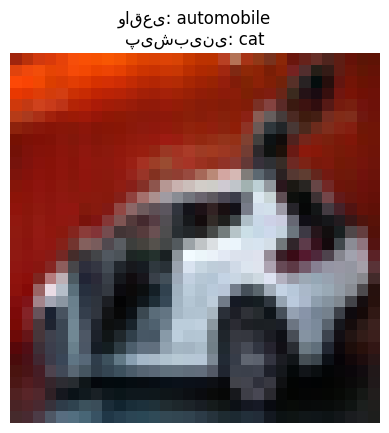

In [49]:
test_sample = np.array([test_images[8]])  # شکل (1, 32, 32, 3)

predictions = model.predict(test_sample)
print("پیش‌بینی‌ها:", predictions)

predicted_class = np.argmax(predictions[0])  # اندیس کلاس پیش‌بینی شده
max_probability = predictions[0][predicted_class]  # بیشترین مقدار احتمال

print(f"\nکلاس پیش‌بینی شده: {class_names[predicted_class]}")
print(f"با احتمال: {max_probability:.4f}")

plt.imshow(test_images[6])
plt.title(f"واقعی: {class_names[test_labels[6]]}\nپیش‌بینی: {class_names[predicted_class]}")
plt.axis('off')
plt.show()